In [1]:
from astropy.io import fits
from astropy.table import Table
import pandas as pd
import matplotlib.pyplot as plt
from PhD_Luminosity_function_final import *
from evfit import *

In [2]:
hdul = fits.open('gkvScienceCatv02.fits')
data = hdul[1].data
t=Table(data)
df = t.to_pandas()

In [3]:
df = df[(df['NQ']>2) & (df['SC']>=7) & (df['mag']<19.72) & (df['RAcen']<300)]

In [4]:
df

,uberID,RAcen,Deccen,RAmax,Decmax,RAGAIA,DecGAIA,sky_mean,skyRMS_mean,log10seeing,...,flux_W2l,flux_err_W2t,duplicate,mask,starmask,uberclass,CATAID,SC,Z,NQ
28,128980003711188,129.579930,-1.029780,129.579933,-1.029784,129.579917,-1.029802,-3.252273e-13,3.965989e-12,-0.251301,...,0.000381,9.162291e-06,False,False,False,1,3600151,8,0.08185,4
39,128980004608892,129.579121,-1.246004,129.579142,-1.245971,129.579127,-1.245989,-6.235091e-13,4.453040e-12,-0.251301,...,0.000051,6.123744e-07,False,False,False,1,3874273,7,0.30551,4
46,128980005210530,129.578549,-1.091716,129.578537,-1.091739,129.578521,-1.091757,-1.983639e-13,4.022541e-12,-0.251301,...,0.000268,8.127045e-06,False,False,False,1,3600249,8,0.28994,4
48,128980005309861,129.578474,-1.154733,129.578459,-1.154730,129.578443,-1.154749,-1.950925e-13,4.120472e-12,-0.251301,...,0.000079,2.108944e-06,False,False,False,1,3600327,7,0.27092,4
79,128980008210800,129.575720,-1.066314,129.575705,-1.066317,129.575689,-1.066335,-4.437626e-13,4.039319e-12,-0.251301,...,0.000067,1.040680e-06,False,False,False,1,3600321,7,0.29026,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1774035,224021222504535,223.031751,2.343636,223.031720,2.343569,223.031692,2.343541,-1.074581e-13,3.976355e-12,-0.210898,...,0.000074,1.793492e-06,False,False,False,1,263129,8,0.31855,4
1774051,224021225210755,223.028958,2.929282,223.028921,2.929247,223.028893,2.929219,-5.399757e-13,3.939633e-12,-0.210898,...,0.000149,1.444302e-06,False,False,False,1,3336094,7,0.48823,4
1774058,224021226105464,223.028218,2.431092,223.028290,2.431043,223.028262,2.431016,-6.621136e-15,4.026632e-12,-0.210898,...,0.000090,1.647582e-06,False,False,False,1,364114,8,0.19686,4
1774074,224021228202966,223.026430,2.195831,223.026413,2.195829,223.026385,2.195802,-5.616802e-13,4.213400e-12,-0.210898,...,0.000124,1.279430e-06,False,False,False,1,263115,7,0.31247,4


('lambda', 'pass')
('lambda', 'pass')
('lambda', 'pass')
('lambda', 'pass')
('lambda', 'pass')


C:\Users\adrie\anaconda3\lib\site-packages\kcorrect\template.py:221: RuntimeWarning: underflow encountered in divide
  self.flux = self.restframe_flux / (1. + redshift)


Fixed  0 missing fluxes
Replacing 38 bad fits with mean


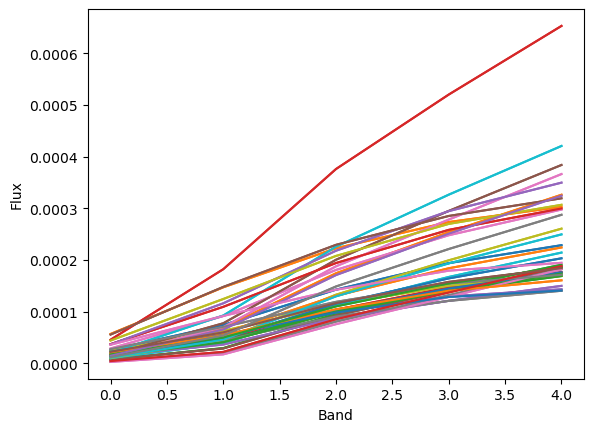

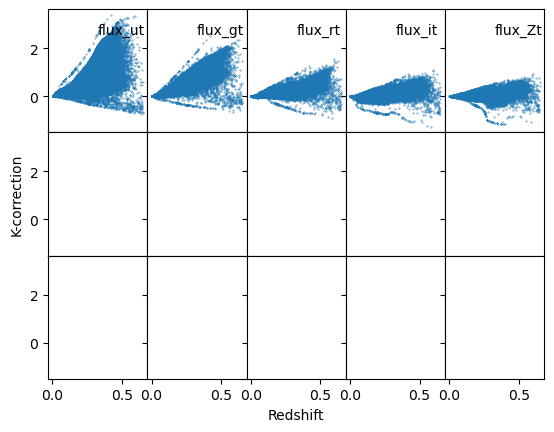

C:\Users\adrie\kcorr_final.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Kcorrection'] = k.tolist()
C:\Users\adrie\kcorr_final.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['r_Kcorrection'] = [x[index] for x in k]
C:\Users\adrie\kcorr_final.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

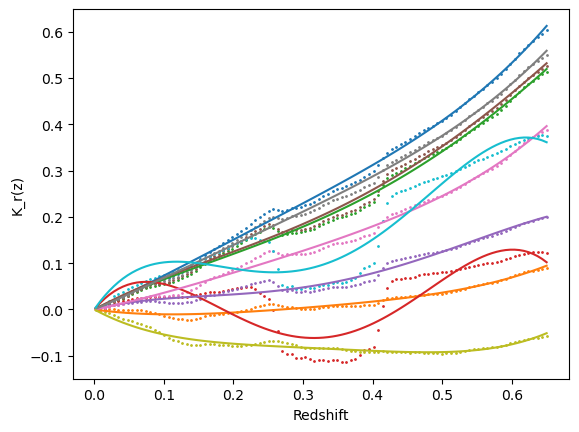

In [5]:
df = kcorrection(df, responses=['vst_u', 'vst_g', 'vst_r', 'vst_i', 'vista_z'], fnames=['flux_ut', 'flux_gt', 'flux_rt', 'flux_it', 'flux_Zt'], ferrnames=['flux_err_ut', 'flux_err_gt', 'flux_err_rt', 'flux_err_it', 'flux_err_Zt'], redshift='Z')

In [6]:
df = luminosity_distance(df, redshift='Z')

C:\Users\adrie\PhD_Luminosity_function_final.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Lum_Distance'] = Distance ( z=dataframe[redshift].values, cosmology = LambdaCDM(H0, Om0, Ode0) ).to(u.parsec).value


In [7]:
df = magnitude(df, bands=['u', 'g', 'r', 'i', 'Z'], fluxbands = ['flux_ut', 'flux_gt', 'flux_rt', 'flux_it', 'flux_Zt'])

C:\Users\adrie\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\adrie\PhD_Luminosity_function_final.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[f'm_{bands[i]}'] = 8.9 - 2.5 * np.log10(dataframe[fluxbands[i]])
C:\Users\adrie\PhD_Luminosity_function_final.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[f'M_{bands[i]}'] = dataframe[f'm_{bands[i]}'] - 5 * np

In [8]:
df

,uberID,RAcen,Deccen,RAmax,Decmax,RAGAIA,DecGAIA,sky_mean,skyRMS_mean,log10seeing,...,m_u,M_u,m_g,M_g,m_r,M_r,m_i,M_i,m_Z,M_Z
0,128980003711188,129.579930,-1.029780,129.579933,-1.029784,129.579917,-1.029802,-3.252273e-13,3.965989e-12,-0.251301,...,20.159258,-17.256015,18.294933,-19.026887,17.328365,-19.873120,16.890331,-20.255718,16.590895,-20.547061
1,128980004608892,129.579121,-1.246004,129.579142,-1.245971,129.579127,-1.245989,-6.235091e-13,4.453040e-12,-0.251301,...,21.078495,-19.410843,20.408955,-20.254069,19.646542,-20.675937,19.380718,-20.898145,19.170029,-21.057486
2,128980005210530,129.578549,-1.091716,129.578537,-1.091739,129.578521,-1.091757,-1.983639e-13,4.022541e-12,-0.251301,...,21.847305,-19.570523,19.806389,-21.331292,18.341553,-22.141490,17.878273,-22.459510,17.517006,-22.744204
3,128980005309861,129.578474,-1.154733,129.578459,-1.154730,129.578443,-1.154749,-1.950925e-13,4.120472e-12,-0.251301,...,21.232170,-19.089028,20.294958,-20.119748,19.472290,-20.586200,19.180294,-20.724391,18.911640,-20.926813
4,128980008210800,129.575720,-1.066314,129.575705,-1.066317,129.575689,-1.066335,-4.437626e-13,4.039319e-12,-0.251301,...,21.139484,-19.329032,20.230236,-20.369163,19.402079,-20.847061,19.094368,-21.097508,18.845167,-21.291705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153954,224021222504535,223.031751,2.343636,223.031720,2.343569,223.031692,2.343541,-1.074581e-13,3.976355e-12,-0.210898,...,20.747770,-19.958616,19.986752,-20.911290,19.094301,-21.419094,18.742004,-21.709777,18.526962,-21.875010
153955,224021225210755,223.028958,2.929282,223.028921,2.929247,223.028893,2.929219,-5.399757e-13,3.939633e-12,-0.210898,...,22.741409,-20.006055,21.163631,-21.848277,19.570961,-22.713964,18.943310,-23.112026,18.468418,-23.478544
153956,224021226105464,223.028218,2.431092,223.028290,2.431043,223.028262,2.431016,-6.621136e-15,4.026632e-12,-0.210898,...,21.065182,-18.465537,19.910173,-19.679185,19.027145,-20.308349,18.630396,-20.594915,18.400307,-20.837490
153957,224021228202966,223.026430,2.195831,223.026413,2.195829,223.026385,2.195802,-5.616802e-13,4.213400e-12,-0.210898,...,22.982391,-18.583657,20.837799,-20.516408,19.429008,-21.257456,18.921093,-21.625961,18.578629,-21.863335


In [9]:
df.to_pickle('dataframe_GAMAIII_ugriZ.pkl')

In [10]:
df_sample = sample(df, 30000)

In [11]:
import pandas as pd
df = pd.read_pickle('dataframe_GAMAIII_ugriZ.pkl')
from evfit import *

C:\Users\adrie\anaconda3\lib\site-packages\kcorrect\template.py:221: RuntimeWarning: underflow encountered in divide
  self.flux = self.restframe_flux / (1. + redshift)



************************
jswml.py version  1.1
survey :  GAMAIII
mlims :  (0, 19.72)
redshift range : [ 0.002 ;  0.65 ]
area :  180
method :  post
Kcorrect responses :  ['vst_u', 'vst_g', 'vst_r', 'vst_i', 'vista_z']
{}
CosmoLookup: H0=100.0, Omega_l=0.7, P=1
H0, omega_l, z0, area/Sr =  100.0 0.7 0 0.05483113556160754
30000 galaxies selected
No column r_sb; ignoring SB completeness
No column fibermag_r; ignoring redshift completeness
Setting LF bin limits Qmin, Qmax =  0.0 1.5
LF bins at Qmin:  [   2   14   39   93  198  428  753 1208 1799 2264 2502 2756 2758 2516
 2175 1894 1783 1419 1135  894  723  581  455  317  271  251  164  110
   96   99   57   56   39   30   31   25   12   14   11    5]
LF bins at Qmax:  [   0    0    2    5   21   64  173  380  775 1443 2176 2616 3010 3081
 2974 2557 2126 1959 1441 1169  905  723  576  392  303  274  186  151
   91   95   78   54   47   29   24   35   13   13   12    4]
[False False False False  True  True  True  True  True  True  True  True


  0%|          | 0/30 [00:00<?, ?it/s]

C:\Users\adrie\evfit.py:1076: RuntimeWarning: invalid value encountered in divide
  err = phi/hist**0.5


Simplex optimization ...
Optimization terminated successfully.
         Current function value: 175.314222
         Iterations: 1
         Function evaluations: 3


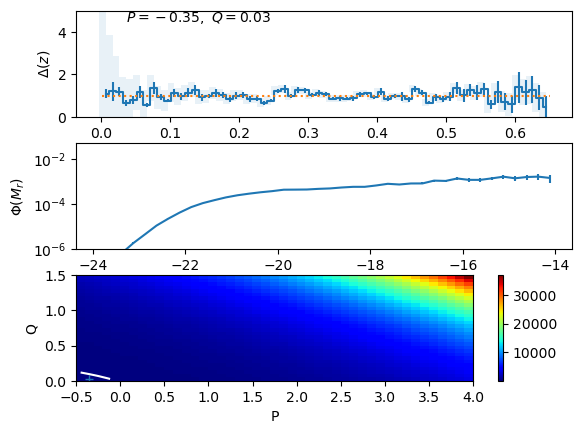

In [12]:
ev_fit(infile=df_sample, outfile='evfit_post_GAMAIII_ugriZ.fits', mlims=(0, 19.72), param='m_r', Mmin=-24, Mmax=-14, Mbin=40, method='post', survey='GAMAIII', area=180, kc_responses=['vst_u', 'vst_g', 'vst_r', 'vst_i', 'vista_z'])


************************
jswml.py version  1.1
survey :  GAMAIII
mlims :  (0, 19.72)
redshift range : [ 0.002 ;  0.65 ]
area :  180
method :  lfchi
Kcorrect responses :  ['vst_u', 'vst_g', 'vst_r', 'vst_i', 'vista_z']
{}
CosmoLookup: H0=100.0, Omega_l=0.7, P=1
H0, omega_l, z0, area/Sr =  100.0 0.7 0 0.05483113556160754
30000 galaxies selected
No column r_sb; ignoring SB completeness
No column fibermag_r; ignoring redshift completeness
Setting LF bin limits Qmin, Qmax =  0.0 1.5
zlo, zhi, Mmin, Mmax, nbins
0.002 0.2013846153846154 -39.410682714881695 -9.173719347194947 34
LF bins at Qmin:  [   0    0    0    3    7   13   31   84  170  324  454  633  808  956
 1131 1274 1540 1390 1135  894  723  581  455  317  271  251  164  110
   96   99   57   56   39   30   31   25   12   14   11    5]
0.2013846153846154 0.65 -43.238362143369784 -19.690682714881696 16
LF bins at Qmin:  [   2   14   39   90  191  415  722 1124 1629 1940 2048 2123 1950 1560
 1044  620  243   29    0    0    0    0   

  0%|          | 0/30 [00:00<?, ?it/s]

Simplex optimization ...
Optimization terminated successfully.
         Current function value: 308.551474
         Iterations: 25
         Function evaluations: 47


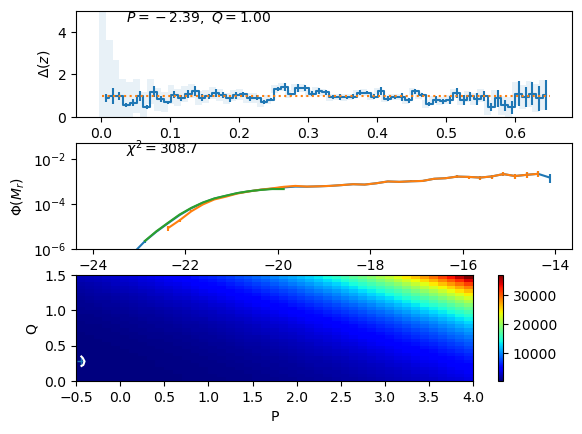

In [13]:
ev_fit(infile=df_sample, outfile='evfit_lfchi_GAMAIII_ugriZ.fits', mlims=(0, 19.72), param='m_r', Mmin=-24, Mmax=-14, Mbin=40, method='lfchi', survey='GAMAIII', area=180, kc_responses=['vst_u', 'vst_g', 'vst_r', 'vst_i', 'vista_z'])